# Feature Analysis

In [6]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


You should consider upgrading via the 'c:\users\azawada\python\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser 

In [3]:
data = pd.read_csv('appdata10.csv')

In [10]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [12]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
data.hour=data.hour.str.slice(1,3).astype('int') #converting col 'hour' to int 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [5]:
dataset = data.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])

## Histograms 

In [14]:
dataset.shape

(50000, 7)

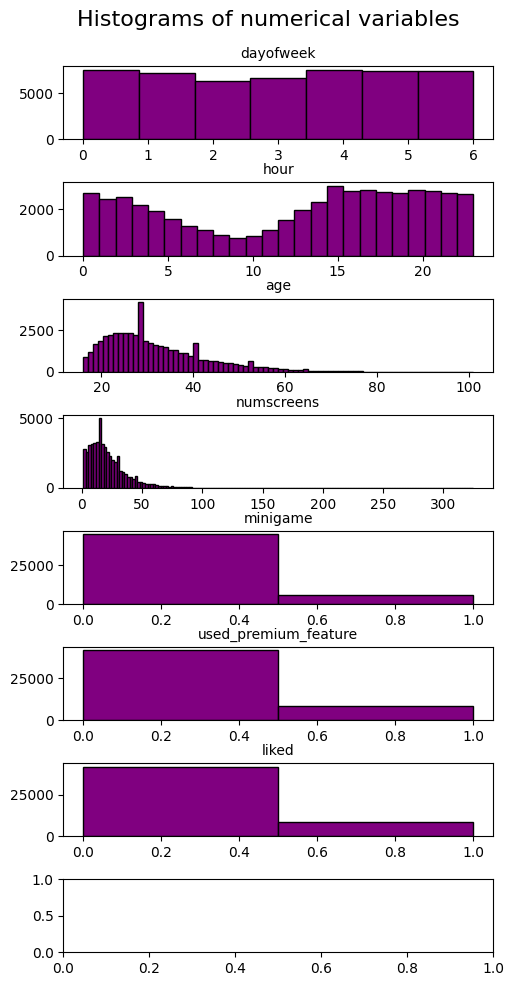

In [34]:

fig, axs = plt.subplots(nrows=dataset.shape[1]+1, figsize = (5,10))
fig.suptitle('Histograms of numerical variables\n', fontsize = 16)
fig.tight_layout(pad=1.0)

for i in range(0,dataset.shape[1]):
    bins = np.size(dataset.iloc[:,i].unique())
    axs[i].hist(dataset.iloc[:,i],bins = bins, color = 'purple',edgecolor='black')
    axs[i].set_title(dataset.columns.values[i],fontsize = 10)


plt.show()

## Correlation Plot 

<AxesSubplot: title={'center': 'Correlation'}>

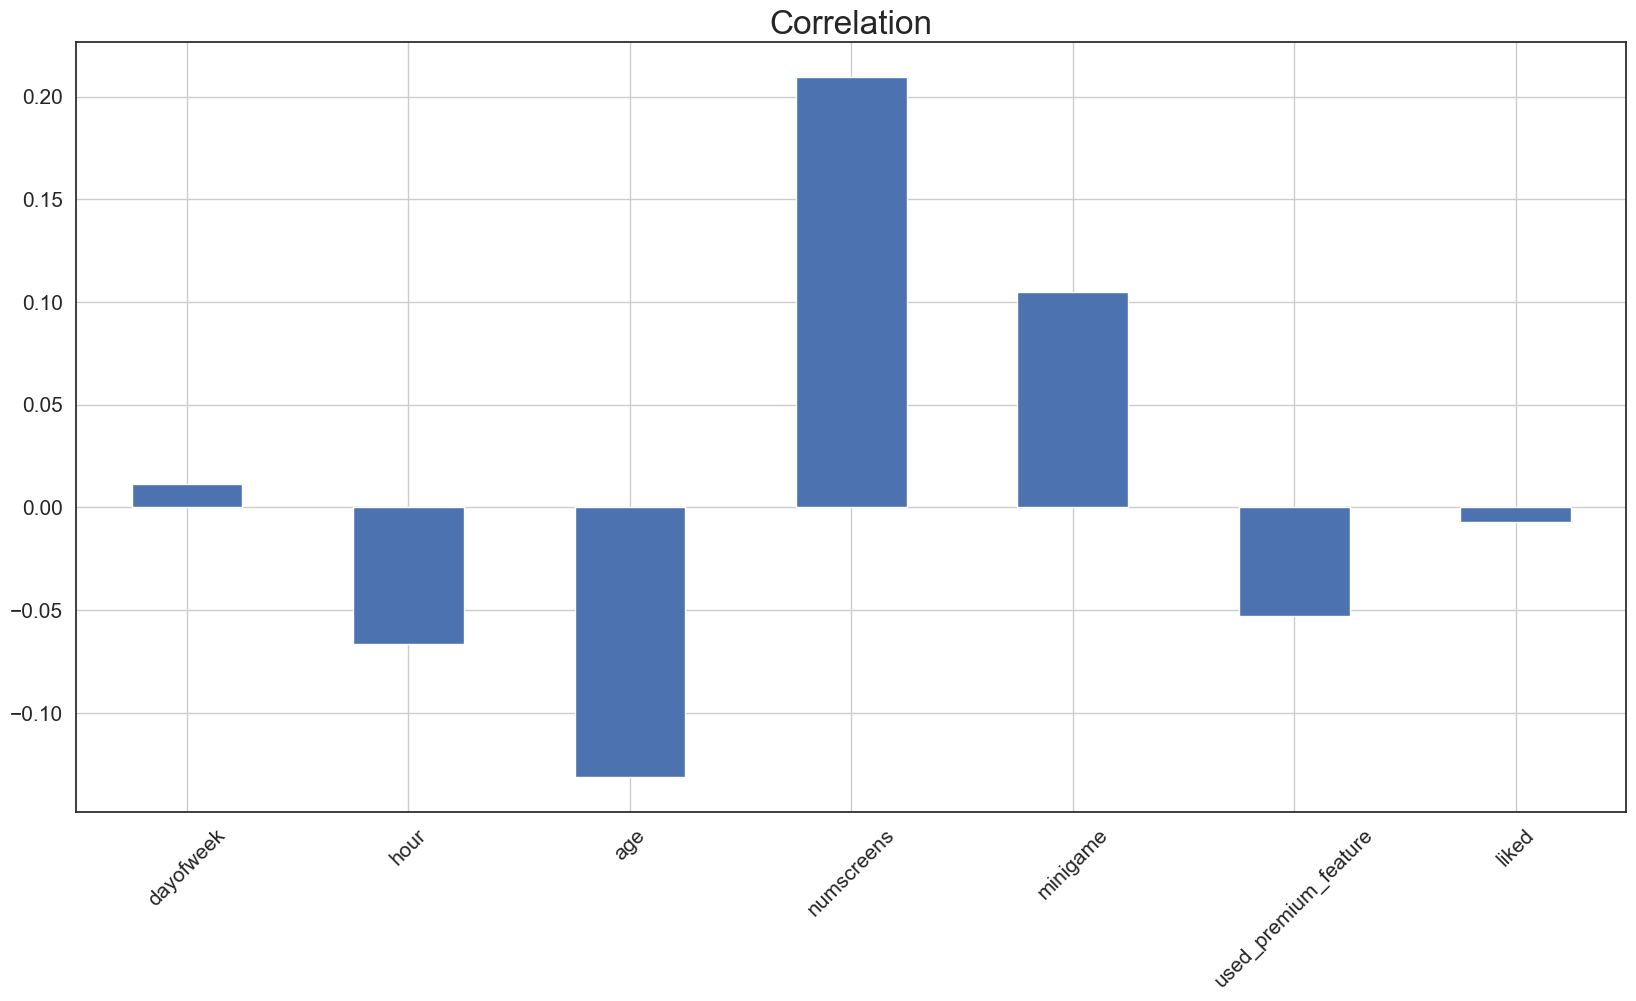

In [101]:
dataset.corrwith(data.enrolled).plot.bar(figsize=(20,10),
                                        title = 'Correlation',
                                        fontsize = 15, rot = 45
                                        , grid = True)

## Correlation matrix 

C:\Users\AZAWADA\AppData\Local\Temp\1\ipykernel_15060\625985189.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


<AxesSubplot: >

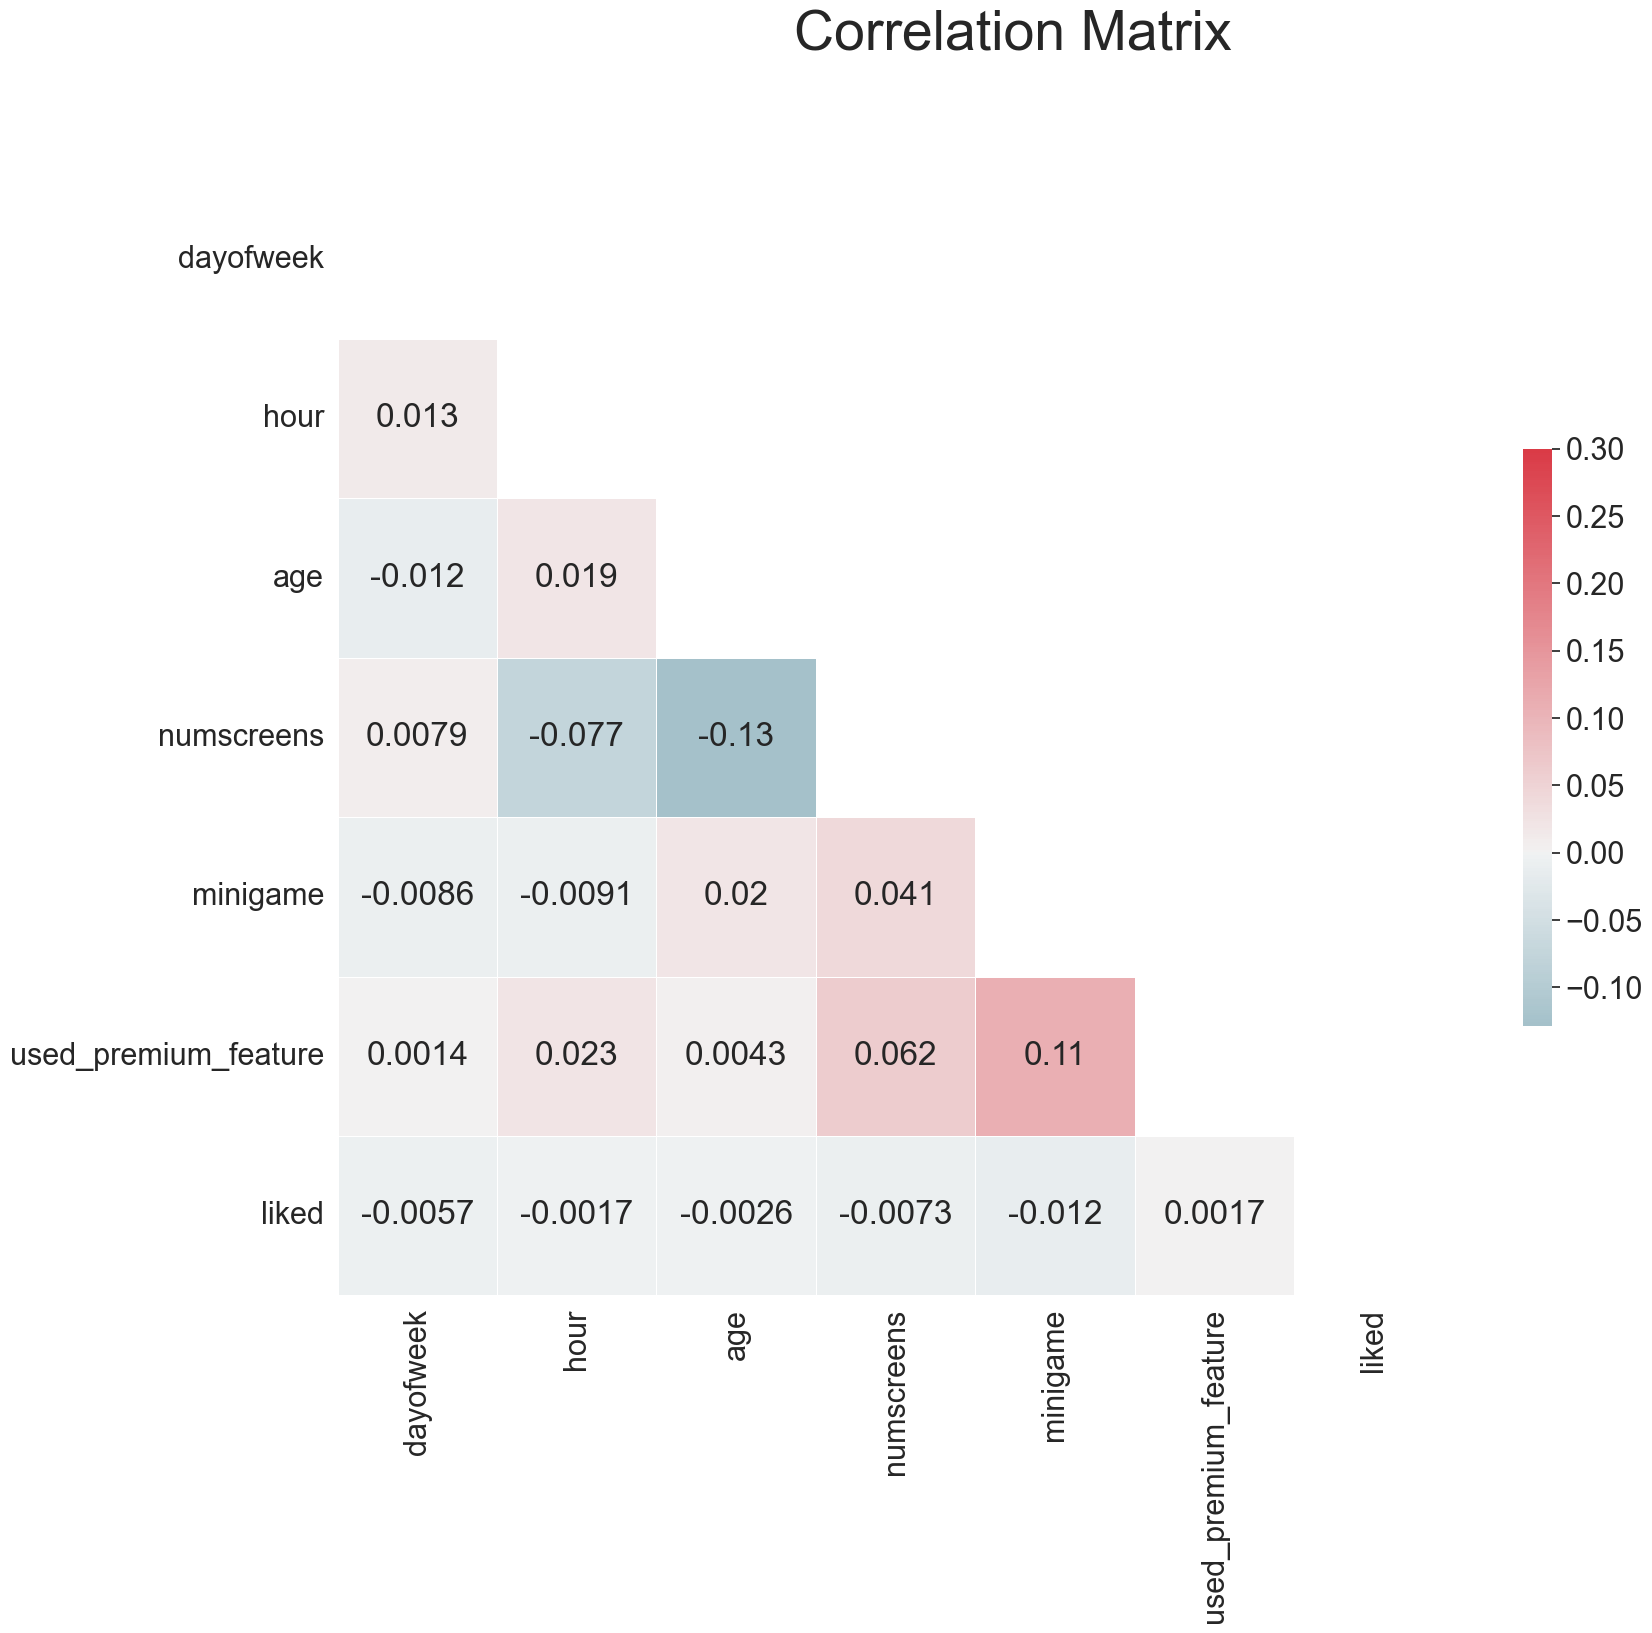

In [102]:
sns.set(style='white', font_scale = 2)
corr = dataset.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(18,15))
fig.suptitle('Correlation Matrix',fontsize=40)
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.3,center=0, square=True,linewidths=0.5,cbar_kws={'shrink':0.5},annot=True)

## Feature Engineering

In [103]:
data['first_open']

0        2012-12-27 02:14:51.273
1        2012-12-02 01:16:00.905
2        2013-03-19 19:19:09.157
3        2013-07-05 16:08:46.354
4        2013-02-26 18:50:48.661
                  ...           
49995    2013-05-09 13:46:17.871
49996    2013-04-09 00:05:17.823
49997    2013-02-20 22:41:51.165
49998    2013-04-28 12:33:04.288
49999    2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: object

In [104]:
data['enrolled_date']

0                            NaN
1                            NaN
2                            NaN
3        2013-07-05 16:11:49.513
4        2013-02-26 18:56:37.841
                  ...           
49995    2013-05-09 13:47:52.875
49996                        NaN
49997                        NaN
49998    2013-04-28 12:35:38.709
49999                        NaN
Name: enrolled_date, Length: 50000, dtype: object

In [105]:
data['first_open'] = data['first_open'].apply(lambda x: parser.parse(x))
data['enrolled_date'] = [parser.parse(row) if isinstance(row,str) else row for row in data['enrolled_date']]

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int32         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   used_premium_feature  50000 non-null  int64         
 9   enrolled              50000 non-null  int64         
 10  enrolled_date         31074 non-null  datetime64[ns]
 11  liked                 50000 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [107]:
data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')

Text(0.5, 1.0, 'Distribution of time to enroll [h]')

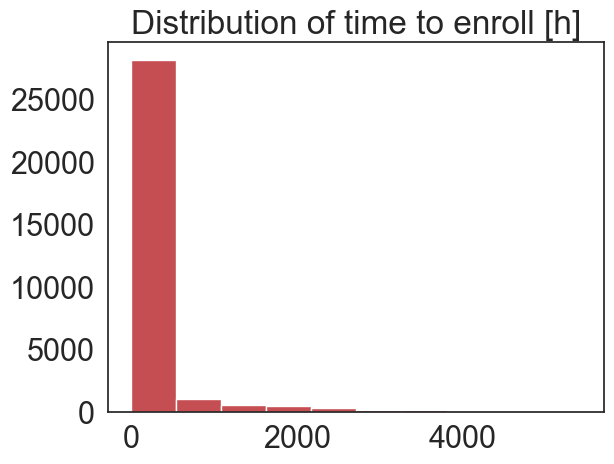

In [108]:
plt.hist(data['difference'].dropna(), color = 'r')
plt.title('Distribution of time to enroll [h]')

Text(0.5, 1.0, 'Distribution of time to enroll [h]')

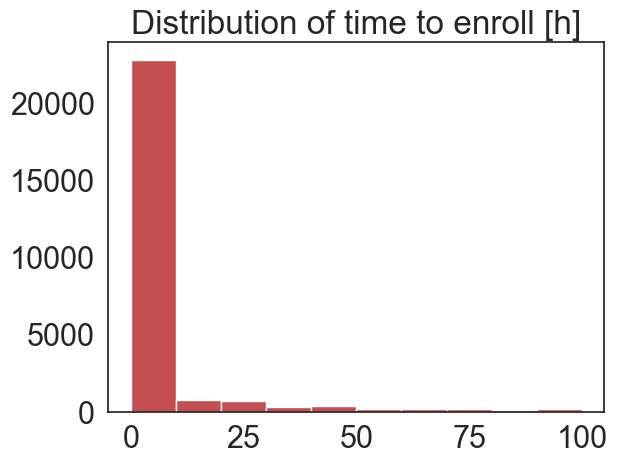

In [109]:
plt.hist(data['difference'].dropna(), color = 'r', range=[0,100])
plt.title('Distribution of time to enroll [h]')

In [111]:
# I'll limit the time to enroll to first 48 hours
data.loc[data.difference > 48, 'enrolled'] = 0
data.drop(columns = ['difference', 'enrolled_date','first_open'], inplace = True)

In [112]:
data.sample(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
25098,269465,5,14,27,"Home,Credit3Container,ScanPreview,VerifyPhone,...",30,0,0,1,0
30082,269033,5,17,22,"Cycle,Home,Credit3Container,Credit3Dashboard,C...",10,0,0,1,0
43931,60488,5,5,26,"Splash,Home,ScanPreview,Institutions,SelectIns...",27,0,0,0,1
20887,166841,6,11,31,"Splash,Home,ScanPreview,location,VerifyDateOfB...",12,0,0,1,0
3066,136589,3,1,28,"Cycle,Home,product_review,product_review,produ...",41,0,0,1,0


### Handling screen_list 

In [113]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [114]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [115]:
data['screen_list'] = data.screen_list.astype(str)+','

In [116]:
data['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [117]:
#One-hot encoding
for screen in top_screens:
    data[screen] = data.screen_list.str.contains(screen).astype('int')
    data['screen_list'] = data.screen_list.str.replace(screen + ',','')

In [118]:
data['other'] = data.screen_list.str.count(",")
data.drop(columns = ['screen_list'], inplace = True)

In [119]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [120]:
#creating channels based on the product knowledge
saving_screens = ['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6', 'Saving7', 'Saving8', 'Saving9', 'Saving10']

cm_screens = ['Credit1', 'Credit2', 'Credit3', 'Credit3Dashboard','Credit3Container']

loan_screens = ['Loan', 'Loan2', 'Loan3', 'Loan4']

cc_screens = ['CC1', 'CC1Category','CC3']



In [121]:
data['Saving_counts'] = data[saving_screens].sum(axis = 1) #new column replacing all in saving_screens and counting
data.drop(columns = saving_screens, inplace = True)

In [124]:
data['Cc_counts'] = data[cc_screens].sum(axis = 1) #new column replacing all in saving_screens and counting
data.drop(columns = cc_screens, inplace = True)
data['Loan_counts'] = data[loan_screens].sum(axis = 1) #new column replacing all in saving_screens and counting
data.drop(columns = loan_screens, inplace = True)
data['Credit_counts'] = data[cm_screens].sum(axis = 1) #new column replacing all in saving_screens and counting
data.drop(columns = cm_screens, inplace = True)

In [125]:
data.shape

(50000, 50)

In [126]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'Saving_counts', 'Cc_counts', 'Loan_counts', 'Credit_counts'],
      dtype='object')

In [127]:
# write this dataset into new file
data.to_csv('cleaned_appdata.csv', index = False)